## Import modules needed for this Jupyter notebook:

In [21]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import datetime, nltk, warnings
import itertools
from collections import Counter 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load in the Chanel study data by reading in the CSV file. 
## Display some of the data in a pandas Dataframe (a table we can manipulate)

In [22]:
def shorten_ids(column: pd.DataFrame):
    column = column.astype('string')
    new_column = column.str.split("-", 1)
    new_column = [i.pop(0) for i in new_column]
    return new_column

df = pd.read_csv('chanel-cleaned-brands-only.csv')

print('Dataframe dimensions:', df.shape)
df['id'] = shorten_ids(df['id'])
df = df.drop(columns='email')

pd.set_option('display.max_colwidth', 300)
pd.set_option('display.colheader_justify', 'center')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 400 

df.head(20)

Dataframe dimensions: (90, 12)


,id,name,age,city,ethnicity,group,Brand #1,Brand #2,Factor #1,Factor #2,Factor #3
0,1431a109,Jiangrong Jin,33,San Marino,Asian,Under 40,Valentino,Dior,Quality,Lasts a Lifetime,Classic
1,d3fce5aa,Liz Giglio,33,Boston,White,Under 40,Balmain,Fendi,Timeless,Quality,Craftsmanship
2,7b2eaa22,Barbra Berwald,48,new york,White,40-60,Bailmain,Sain Laurent,Quality,Expensive,Creativity
3,0b52b90c,Yelena Ostrovskaya,34,Los Angeles,None,Under 40,Burberry,Gucci,Expensive,Quality,Creativity
4,b3dfb81b,Andie Schneider,30,New York,White,Under 40,Assoulin,Balmain,Timeless,Classic,Edgy
5,066c6959,Claravel Criste,47,Marion,Asian,40-60,Gucci,Hermes,Quality,Timeless,Expensive
6,7b99ef93,Fei Guo,35,Somerville,Asian,40-60,D&G,Hermes,Service,Unique,Expensive
7,06c2d020,Taylor Gordon,25,Miami,None,Under 40,YSL,Gucci,Quality,Craftsmanship,Expensive
8,62899202,Johanna Caplan,47,Philadelphia,White,40-60,Burberry,Burberry,Timeless,Timeless,Expensive
9,7676b88a,Javanna Murray,43,York,None,40-60,Burberry,Vuitton,Unique,Quality,Expensive


In [23]:
brand_list1 = Counter(df['Brand #1'])
brand_list2 = Counter(df['Brand #2'])
brand_list1.update(brand_list2)

## Get a ranked list of all the brands / items uploaded (owned) by participants

In [24]:
brand_list1.most_common(10)

[('Chanel', 23),
 ('Gucci', 19),
 ('Burberry', 15),
 ('Hermes', 11),
 ('D&G', 9),
 ('Fendi', 9),
 ('Valentino', 8),
 ('Prada', 8),
 ('YSL', 7),
 ('Dior', 7)]

## Do the same thing for the "Factors" (the words participants use to describe 'luxury')

In [25]:
f1 = Counter(df['Factor #1'])

In [26]:
f1.most_common(10)

[('Quality', 49),
 ('Expensive', 11),
 ('Timeless', 10),
 ('Service', 4),
 ('Unique', 3),
 ('Retains Value', 3),
 ('History', 2),
 ('Creativity', 2),
 ('Feels Good', 2),
 ('Expensive ', 2)]

## Load in a new cleaned version of the dataset to show Chanel ownership (0=no; 1=yes)
## Also remove null values from factors columns
### We are going to train a machine learning model using 2/3 of the participants
### Then test the efficacy of our model using the other 1/3

In [27]:
train = pd.read_csv('chanel-binary-class-chanel-train.csv')
train.head(20)

,Chanel owner,age,city,ethnicity,group,factor #1
0,1,53,Miami,White,40-60,Classic
1,0,24,Los Angeles,White,Under 40,Expensive
2,0,27,Miami,African American,Under 40,Expensive
3,1,32,New York,White,Under 40,Expensive
4,1,59,New York,White,40-60,Expensive
5,0,33,New York,Asian,Under 40,Expensive
6,0,50,Los Angeles,White,40-60,Expensive
7,0,40,Denver,White,40-60,Expensive
8,0,28,Atlanta,Asian,Under 40,Expensive
9,1,29,Miami,White,Under 40,Feels Good


print(1+2)

In [28]:
sns.set_theme()
sns.set_context('paper')

## Compare the number of participants who own Chanel to those who don't
### 0 = doesn't own; 1 = owns. 

<AxesSubplot:xlabel='Chanel owner', ylabel='count'>

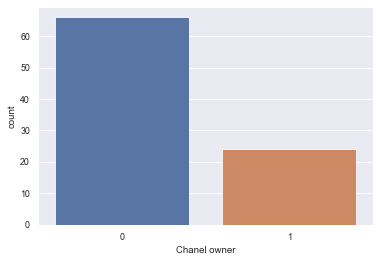

In [29]:
sns.countplot(x='Chanel owner', data=train)

## Add another data point - 'group' - to see if that changes anything
### And then with 'eithnicity' 
### And then with the feature words

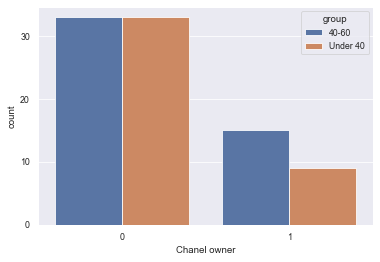

In [30]:
sns.countplot(x='Chanel owner', hue='group', data=train)
sns.set_context('poster')

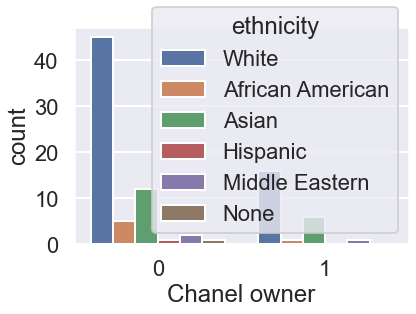

In [31]:
# looks like people who own Chanel tend to be 40 - 60 years old
sns.countplot(x='Chanel owner', hue='ethnicity', data=train)
sns.set_context('paper')

<AxesSubplot:xlabel='Chanel owner', ylabel='count'>

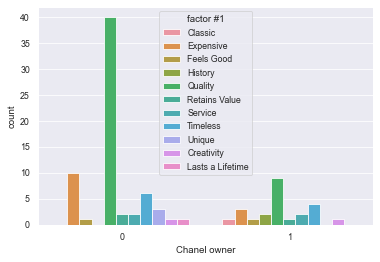

In [32]:
sns.countplot(x='Chanel owner', hue='factor #1', data=train)

## Create a histogram (distribution) of participant ages

<AxesSubplot:ylabel='Frequency'>

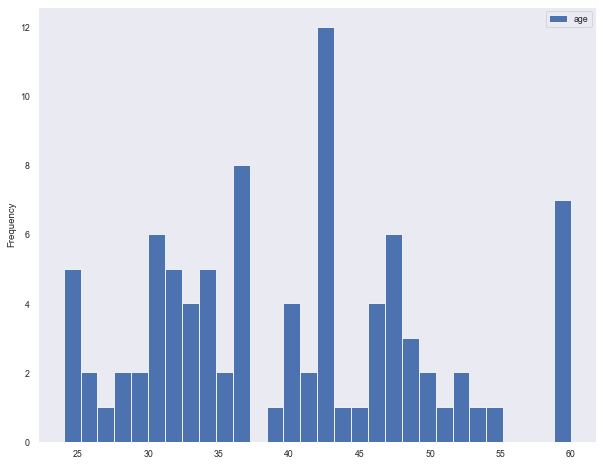

In [33]:
train['age'].plot.hist(figsize=(10, 8), legend=True, grid=False, bins=30)

## Use a boxplot to see avearage age of Chanel owners and non-owners, and age range

<AxesSubplot:xlabel='Chanel owner', ylabel='age'>

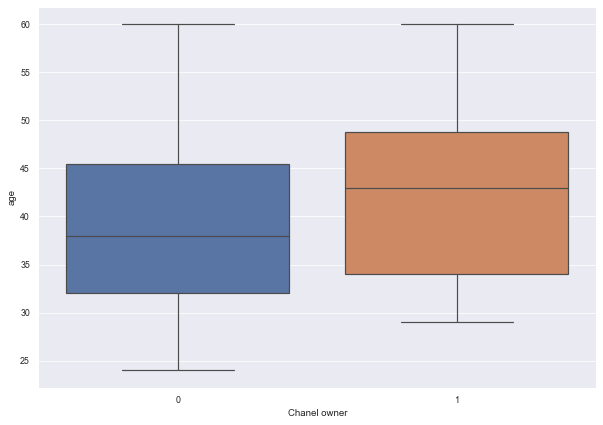

In [34]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Chanel owner', y='age', data=train)

## Gets a little mathematical here - we need to convert 'categorical' data types (words, basically) into numbers.
## For example, 'ethnicity' values - 'white', 'asian', 'african american' - become numbers

In [35]:
city = pd.get_dummies(train['city'])
ethnicity = pd.get_dummies(train['ethnicity'])
group = pd.get_dummies(train['group'], drop_first=True)
factor1 = pd.get_dummies(train['factor #1'])

## Now display the dataframe again with numbers in place of categories / words

In [36]:
train.drop(['city', 'ethnicity', 'group', 'factor #1'], axis=1, inplace=True)
train.head()
train2 = pd.concat([train['Chanel owner'], train['age'], city, ethnicity, group, factor1], axis=1)
train2.head()

,Chanel owner,age,Atlanta,Boston,Chicago,Chicago,Cincinnati,Dallas,Dallas,Denver,Los Angeles,Miami,New York,Philadelphia,San Francisco,African American,Asian,Hispanic,Middle Eastern,None,White,Under 40,Classic,Creativity,Expensive,Feels Good,History,Lasts a Lifetime,Quality,Retains Value,Service,Timeless,Unique
0,1,53,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,24,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
2,0,27,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,1,32,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
4,1,59,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


## MACHINE LEARNING PART!
### We train our model - which is trying to create a function that accurately describes the data - then test it. 

In [40]:
X = train2.drop('Chanel owner', axis=1)
y = train2['Chanel owner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression 

## Results
### We care about the 'weighted avg' number in the 'f1-score' column
### We read these as percentages -> 0.67 = 67% accuracy 

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       1.00      0.20      0.33        10

    accuracy                           0.73        30
   macro avg       0.86      0.60      0.58        30
weighted avg       0.81      0.73      0.67        30



## Unfortunately, 67% is not high enough to be an accurate model, which means we need either:
### - More data 
### - A different approach (than logistic regression)
### - Both

# NLP APPROACH
## Now we're going to analyze the full responses from all participants (not just the excerpted factors), using NLP 

In [109]:
df = pd.read_csv('chanel-full-nlp_nn.csv')

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.colheader_justify', 'center')
pd.options.display.max_columns = 200
pd.options.display.max_rows = 400
df.head() 

,chanel buyer,age,city,ethnicity,group,response
0,1,32,Anchorage,White,Under 40,A certain price point is definitely a major factor. Anything over $750 seems lux. Also exclusive...
1,1,35,Atlanta,White,Under 40,"I believe a luxury fashion brands are good investment pieces that offers quality, uniqueness and..."
2,1,40,Atlanta,African American,40-60,Craftsmanship and unique pieces
3,0,28,Atlanta,White,Under 40,"The quality and craftsmanship of the products that the brand offers, also the level of service a..."
4,0,37,Atlanta,White,Under 40,"It’s the quality, the customer service and the longevity of the products. I have things that i w..."


## Binary Classification - someone is or isn't a Chanel buyer - using NLP
## The Steps:
    - Exploratory data analysis 
    - Feature engineering
    - Text pre-processing 
    - Vectorization
    - TF-IDF
    - Training a model: train/test split 
    - Model evaluation

## Exploratory data analysis 

## Feature engineering // data visualization


In [112]:
df['length'] = df['response'].apply(len)
df.head()

,chanel buyer,age,city,ethnicity,group,response,length
0,1,32,Anchorage,White,Under 40,A certain price point is definitely a major factor. Anything over $750 seems lux. Also exclusive...,502
1,1,35,Atlanta,White,Under 40,"I believe a luxury fashion brands are good investment pieces that offers quality, uniqueness and...",116
2,1,40,Atlanta,African American,40-60,Craftsmanship and unique pieces,31
3,0,28,Atlanta,White,Under 40,"The quality and craftsmanship of the products that the brand offers, also the level of service a...",285
4,0,37,Atlanta,White,Under 40,"It’s the quality, the customer service and the longevity of the products. I have things that i w...",167


In [114]:
df.length.describe()

count     252.000000
mean      237.468254
std       206.453305
min         9.000000
25%        97.750000
50%       192.500000
75%       310.500000
max      1316.000000
Name: length, dtype: float64

In [115]:
df[df['length'] == 1316]['response'].iloc[0]

"Exclusivity - the item I buy won't be easy to find or for others to find. Quality - the construction will be the finest and made to last a long time. Taste - the item will be one that will be in good taste even if it is avant garde or not yet in fashion. Uniqueness - the item will reflect a certain style or aesthetic that the particular brand is known for and will be in character with the identity of the brand. Splurge - the item will be more expensive than other items and will add a feeling of luxe that will elevate any outfit. Overall brand identity - the brand will carefully curate its messaging so that I will feel proud to be associated with the brand and those that wear it.\nInventiveness - the brand will seek to explore new ideas and styles, and to set the trends years in advance, and will not be content to simply follow the mainstream. Design - the item will be designed to feature thoughtful details and features that are unique and will be useful to or delight the wearer. Exper

# Text pre-processing 

In [317]:
import string 
from nltk.corpus import stopwords
import spacy 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pprint import pprint 
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English


# nltk tokenizer
def text_process(corpus):
    nopunc = [char for char in corpus if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split(' ') if word.lower() not in stopwords.words('english')]


def text_process2(corpus):
    nodigit = ''.join([char for char in corpus if not char.isdigit()])
    nopunc = [char for char in nodigit if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split(' ') if word.lower() not in stopwords.words('english')]


# spacy NER tokenizer
def spacy_ner(corpus):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(corpus)
    return [ent.text for ent in doc.ents if ent.label_ == 'PRODUCT' or ent.label_ == 'ORG']
    # return [Counter(lst).most_common(15)]

def basic_tokens(corpus):
    nopunc = [char for char in corpus if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split()]


def quotes(corpus):
    words = [char for char in corpus if char not in string.punctuation]
    results = ', '.join(f'"{w}"' for w in words)
    return results 


def string_tokens(corpus):
    words = text_process(corpus)
    results = ', '.join(f'"{w}"' for w in words)
    return results 


def spacy_tokens(corpus):
    nlp = English()
    tokenizer = nlp.tokenizer 
    doc = tokenizer(corpus)
    return [word for word in doc if word.is_stop == False]

def spacy_ner(corpus):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(corpus)
    return [ent.text for ent in doc.ents if ent.label_ == 'PRODUCT' or ent.label_ == 'ORG']


def pos(corpus):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(corpus)
    for token in doc:
        return token.text, spacy.explain(token.tag_).upper()

In [318]:
# reload
df = pd.read_csv('chanel-full-nlp_nn.csv')
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.colheader_justify', 'center')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 400

In [319]:
analyzer = SentimentIntensityAnalyzer()

df['length'] = df['response'].apply(len)
df['nltk_tokens'] = df['response'].apply(text_process2)
df['length_nltk'] = df['nltk_tokens'].apply(len)
df['spacy_tokens'] = df['response'].apply(spacy_tokens)
df['length_spacy'] = df['spacy_tokens'].apply(len)
df['sentiment'] = df['response'].apply(lambda response: analyzer.polarity_scores(response)['compound'])
df.head()

,chanel buyer,age,city,ethnicity,group,response,length,nltk_tokens,length_nltk,spacy_tokens,length_spacy,sentiment
0,1,32,Anchorage,White,Under 40,A certain price point is definitely a major factor. Anyt...,502,"[certain, price, point, definitely, major, factor, Anyth...",56,"[certain, price, point, definitely, major, factor, ., $,...",54,0.9345
1,1,35,Atlanta,White,Under 40,I believe a luxury fashion brands are good investment pi...,116,"[believe, luxury, fashion, brands, good, investment, pie...",13,"[believe, luxury, fashion, brands, good, investment, pie...",15,0.6486
2,1,40,Atlanta,African American,40-60,Craftsmanship and unique pieces,31,"[Craftsmanship, unique, pieces]",3,"[Craftsmanship, unique, pieces]",3,0.0000
3,0,28,Atlanta,White,Under 40,The quality and craftsmanship of the products that the b...,285,"[quality, craftsmanship, products, brand, offers, also, ...",25,"[quality, craftsmanship, products, brand, offers, ,, lev...",28,0.6369
4,0,37,Atlanta,White,Under 40,"It’s the quality, the customer service and the longevity...",167,"[It’s, quality, customer, service, longevity, products, ...",14,"[quality, ,, customer, service, longevity, products, ., ...",16,0.4404


In [320]:
df['pos'] = df['response'].apply(pos)
df.head()

TypeError: Argument 'string' has incorrect type (expected str, got list)

In [ ]:
sns.countplot(x='Chanel owner', data=df)

In [ ]:

plt.figure(figsize=(10, 7))
sns.boxplot(x='Chanel owner', y='age', data=train)



In [ ]:
sns.countplot(x='Chanel owner', hue='group', data=train)
sns.set_context('poster')

## Vectorization 
### Now we have the participant responses as lists of tokens and now we need to convert each of those messages into a vector that a machine learning model can understand. 
### We'll do that in three steps:
    1. Count how many times does a word occur in each message (Known as term frequency)
    2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
    3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [252]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transform = CountVectorizer(analyzer=text_process).fit(df['string_tokens'])
print(len(bow_transform.vocabulary_))

1565


In [219]:
response1 = df['string_tokens'][0]
print(response1)


"certain", "price", "point", "definitely", "major", "factor", "Anything", "750", "seems", "lux", "Also", "exclusively", "like", "items", "somewhat", "hard", "get", "example", "Chanel", "can’t", "purchased", "online", "makes", "luxury", "Also", "many", "luxury", "brands", "make", "limited", "number", "items", "certain", "season", "makes", "seem", "Lux", "also", "like", "buy", "things", "see", "people", "wearing", "reality", "TV", "I’m", "major", "Bravo", "fan", "get", "lot", "luxury", "inspiration", "housewives", "wear"


In [220]:
bow1 = bow_transform.transform([response1])
print(bow1)
print(bow1.shape)

  (0, 14)	1
  (0, 21)	2
  (0, 25)	1
  (0, 44)	1
  (0, 45)	1
  (0, 108)	1
  (0, 123)	1
  (0, 173)	1
  (0, 242)	1
  (0, 345)	1
  (0, 354)	1
  (0, 364)	1
  (0, 383)	2
  (0, 517)	1
  (0, 618)	1
  (0, 624)	1
  (0, 647)	1
  (0, 654)	1
  (0, 713)	2
  (0, 752)	1
  (0, 783)	1
  (0, 823)	1
  (0, 845)	2
  (0, 896)	2
  (0, 901)	1
  (0, 922)	1
  (0, 926)	1
  (0, 929)	3
  (0, 936)	2
  (0, 937)	1
  (0, 938)	2
  (0, 941)	1
  (0, 1013)	1
  (0, 1027)	1
  (0, 1069)	1
  (0, 1096)	1
  (0, 1113)	1
  (0, 1137)	1
  (0, 1163)	1
  (0, 1239)	1
  (0, 1245)	1
  (0, 1248)	1
  (0, 1249)	1
  (0, 1307)	1
  (0, 1397)	1
  (0, 1505)	1
  (0, 1508)	1
(1, 1564)


In [221]:
print(bow_transform.get_feature_names()[783])

housewives


In [208]:
responses_bow = bow_transform.transform(df['string_tokens'])

In [209]:
print('Shape of Sparse Matrix: ', responses_bow.shape)
print('Amount of Non-Zero occurences: ', responses_bow.nnz)

Shape of Sparse Matrix:  (252, 1564)
Amount of Non-Zero occurences:  4953


In [210]:
sparsity = (100.0 * responses_bow.nnz / (responses_bow.shape[0] * responses_bow.shape[1]))
print(f'sparsity: {round(sparsity)}')

sparsity: 1


In [222]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(responses_bow)
tfidf1 = tfidf_transformer.transform(bow1)
print(tfidf1)

  (0, 1508)	0.10024136177235389
  (0, 1505)	0.09471970218483909
  (0, 1397)	0.10181413403518795
  (0, 1307)	0.16070024504592076
  (0, 1249)	0.13548756766444356
  (0, 1248)	0.16070024504592076
  (0, 1245)	0.10919569221514071
  (0, 1239)	0.1193140159348524
  (0, 1163)	0.16070024504592076
  (0, 1137)	0.13047080340913733
  (0, 1113)	0.10525812602766013
  (0, 1096)	0.1262291896686266
  (0, 1069)	0.11641491350194504
  (0, 1027)	0.14162759088342222
  (0, 1013)	0.16070024504592076
  (0, 941)	0.11139814924663881
  (0, 938)	0.17423661552072134
  (0, 937)	0.09734225933944651
  (0, 936)	0.28325518176684444
  (0, 929)	0.14621042682472155
  (0, 926)	0.16070024504592076
  (0, 922)	0.11379235634733763
  (0, 901)	0.1193140159348524
  (0, 896)	0.1671258294211084
  (0, 845)	0.1351505655330303
  (0, 823)	0.16070024504592076
  (0, 783)	0.16070024504592076
  (0, 752)	0.11139814924663881
  (0, 713)	0.18240447224093567
  (0, 654)	0.14954345757163584
  (0, 647)	0.13548756766444356
  (0, 624)	0.1607002450459207

In [212]:
responses_tfidf = tfidf_transformer.transform(responses_bow)
print(responses_tfidf.shape)

(252, 1564)


In [225]:
from sklearn.naive_bayes import MultinomialNB
chanel_buyer_model = MultinomialNB().fit(responses_tfidf, df['chanel buyer'])
chanel_buyer_model_no_tfidf = MultinomialNB().fit(responses_bow, df['chanel buyer'])

In [223]:
print('predicted:', chanel_buyer_model.predict(tfidf1)[0])
print('expected:', df['chanel buyer'][0])

predicted: 1
expected: 1


In [228]:
print('predicted:', chanel_buyer_model_no_tfidf.predict(bow1)[0])
print('expected:', df['chanel buyer'][0])

predicted: 1
expected: 1


## Train / test split

In [218]:
all_predictions = chanel_buyer_model.predict(responses_tfidf)
pprint(all_predictions)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0])


In [229]:
all_predictions_no_tfidf = chanel_buyer_model.predict(responses_bow)
pprint(all_predictions_no_tfidf)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0])


## Evaluating the model 

In [248]:
from sklearn.metrics import classification_report
print (classification_report(df['chanel buyer'], all_predictions))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       156
           1       1.00      0.33      0.50        96

    accuracy                           0.75       252
   macro avg       0.85      0.67      0.66       252
weighted avg       0.82      0.75      0.70       252



In [249]:
print (classification_report(df['chanel buyer'], all_predictions_no_tfidf))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85       156
           1       1.00      0.45      0.62        96

    accuracy                           0.79       252
   macro avg       0.87      0.72      0.74       252
weighted avg       0.84      0.79      0.76       252



In [232]:
from sklearn.model_selection import train_test_split

resp_train, resp_test, chanel_train, chanel_test = train_test_split(df['string_tokens'], df['chanel buyer'], test_size=0.2)
print(len(resp_train), len(resp_test), len(resp_train) + len(resp_test))

201 51 252
